<a href="https://colab.research.google.com/github/FMagnani/ManifoldLearning_scripts/blob/main/mnist_coil20/COIL20_spectral_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laplacian Eigenmap vs fuzzy topological spectral embedding (COIL20)

We want to compare the embedding given by Laplacian Eigenmap with the spectral embedding of the fuzzy topological graph bult by the UMAP algortihm.  
We will use the MNIST and the COIL20 datasets, only partially since I cannot make the Laplacian Eigenmap work with the full datasets (too much computationally expensive I think, even if I have seen people that did it).  


Import COIL20 dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import imageio
import glob
import matplotlib.image as img


path = "drive/MyDrive/Benchmark_Datasets/coil-20-proc/"
        
row_list = []

for im_path in glob.glob(path+"*.png"):

    # im_path is like 'data/coil-20-proc/obj9__41.png'
    obj = im_path.split("obj")[1].split("__")[0]
    view = im_path.split("obj")[1].split("__")[1].split('.')[0]
    
    obj = int(obj)
    view = int(view)
    
    im = np.array(imageio.imread(im_path)) # shape = (128,128)
    im = im.reshape(128*128) # shape = (128*128,)

    row = np.array([obj, view])
    row = np.concatenate((row, im))
    
    row_list.append(row)
            
data = pd.DataFrame(row_list) 
data.columns = np.concatenate( (["obj","view"], data.columns[:-2]) )
     

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data

,obj,view,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,16,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,16,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1436,16,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1437,16,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1438,15,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data[ data.columns[2:] ]
labels = data["obj"]

Let's make a test to estimate the computational time and to see some hint of the results.

In [ ]:
!pip install umap-learn

In [ ]:
from sklearn.manifold import SpectralEmbedding

from umap.umap_ import fuzzy_simplicial_set
from umap.spectral import spectral_layout

In [ ]:

n_neighbors = 15

lapeig_embedding = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors).fit_transform(X)

fuztop_graph, _, _, _ = fuzzy_simplicial_set(
                                                         X,
                                                         n_neighbors = n_neighbors,
                                                         random_state = 123456,
                                                         metric = 'euclidean',
                                                         metric_kwds={},
                                                         knn_indices=None,
                                                         knn_dists=None,
                                                         angular=False,
                                                         set_op_mix_ratio=1.0,
                                                         local_connectivity=1.0,
                                                         apply_set_operations=True,
                                                         verbose=False,
                                                         return_dists=False,
                                                        )

fuztop_embedding = spectral_layout(X, fuztop_graph, dim=2,
                                     random_state=123456, metric='euclidean', metric_kwds={})

# Run time (almost entirely taken by Laplacian Eigenmap): 1 minute
# Really? So fast?
# Guys I'm crying T_T


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


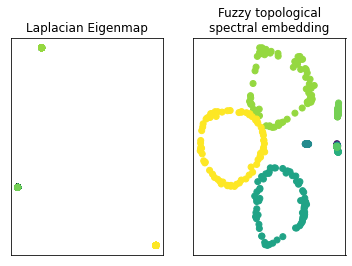

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].scatter(lapeig_embedding[:,0], lapeig_embedding[:,1], c=labels)
ax[1].scatter(fuztop_embedding[:,0], fuztop_embedding[:,1], c=labels)

ax[0].get_xaxis().set_ticks([])
ax[0].get_yaxis().set_ticks([])
ax[1].get_xaxis().set_ticks([])
ax[1].get_yaxis().set_ticks([])

ax[0].set_title("Laplacian Eigenmap")
ax[1].set_title("Fuzzy topological\nspectral embedding")

fig.show()

Make the embedding for various nearest neighbors values

In [ ]:
import pandas as pd

In [ ]:
n_neighbors_list = [5, 10, 15]

emb = pd.DataFrame()
emb["Labels"] = labels

for n_neighbors in n_neighbors_list:

  lapeig_embedding = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors).fit_transform(X)

  fuztop_graph, _, _, _ = fuzzy_simplicial_set(X,
                                               n_neighbors = n_neighbors,
                                               random_state = 123456,
                                               metric = 'euclidean',
                                               metric_kwds={},
                                               knn_indices=None,
                                               knn_dists=None,
                                               angular=False,
                                               set_op_mix_ratio=1.0,
                                               local_connectivity=1.0,
                                               apply_set_operations=True,
                                               verbose=False,
                                               return_dists=False,
                                              )

  fuztop_embedding = spectral_layout(X, fuztop_graph, dim=2,
                                     random_state=123456, metric='euclidean', metric_kwds={})

  emb[ "FuzTop_x_"+str(n_neighbors) ] = fuztop_embedding[:,0]
  emb[ "FuzTop_y_"+str(n_neighbors) ] = fuztop_embedding[:,1]
  emb[ "LapEig_x_"+str(n_neighbors) ] = lapeig_embedding[:,0]
  emb[ "LapEig_y_"+str(n_neighbors) ] = lapeig_embedding[:,1]




/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

In [ ]:
emb.to_csv("coil20_full_embedding.csv")

Check that the csv is correct.

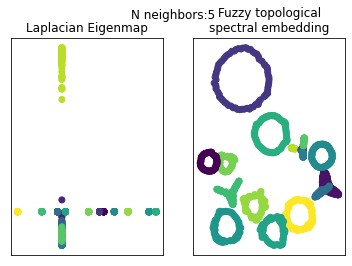

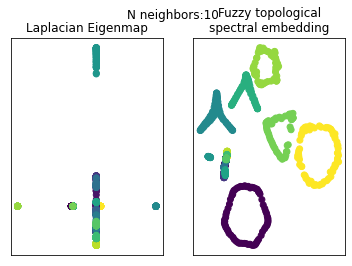

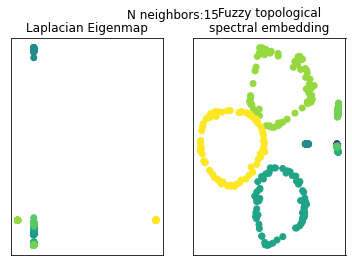

In [ ]:
for n_neighbors in n_neighbors_list:

  fig, ax = plt.subplots(1,2)

  ax[0].scatter(emb["LapEig_x_"+str(n_neighbors)], emb["LapEig_y_"+str(n_neighbors)], c=emb["Labels"])
  ax[1].scatter(emb["FuzTop_x_"+str(n_neighbors)], emb["FuzTop_y_"+str(n_neighbors)], c=emb["Labels"])

  ax[0].get_xaxis().set_ticks([])
  ax[0].get_yaxis().set_ticks([])
  ax[1].get_xaxis().set_ticks([])
  ax[1].get_yaxis().set_ticks([])

  fig.suptitle("N neighbors:"+str(n_neighbors))
  ax[0].set_title("Laplacian Eigenmap")
  ax[1].set_title("Fuzzy topological\nspectral embedding")

  fig.show()

In [ ]:
data.obj.unique()

array([16, 17, 18, 19,  1, 20,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15])